In [1]:
import numpy as np
import sys
import os
import glob
import csv
import re
import time
import copy

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits import mplot3d

%matplotlib inline
plt.style.use("seaborn") # plt.style.available

In [3]:
# Globals
datadir = "C:/Users/mholub/data/sicm/2018/11_Nov/26"

## Cyclic Voltametry

In [41]:
# Locals
exp_name = "cv2"

In [42]:
files, date = get_files(datadir, exp_name)
result = load_result(files)

dict_keys(['Current1(A)', 'dt(s)', 'LineNumber', 'V1(V)', 'Z(um)'])
Number of datapoints = (7802,)


Text(0, 0.5, 'LineNumber')

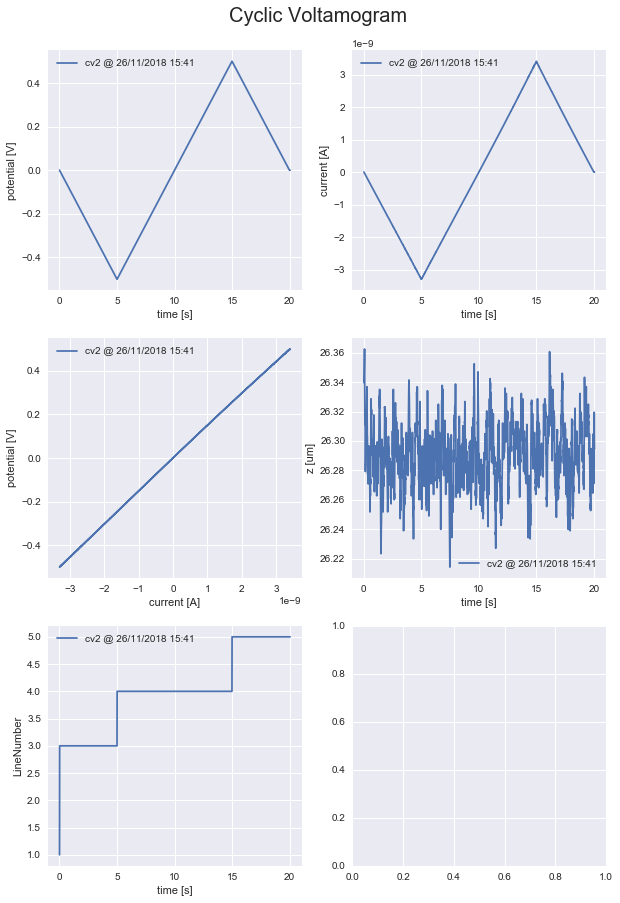

In [128]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 15))
axs = axs.flatten()
fig.suptitle("Cyclic Voltamogram", size = 20, y = 0.92)

axs[0].plot(np.cumsum(result["dt(s)"]), result["V1(V)"])
axs[0].legend(["{} @ {}".format(exp_name, date)])
axs[0].set_xlabel("time [s]")
axs[0].set_ylabel("potential [V]")

axs[1].plot(np.cumsum(result["dt(s)"]), result["Current1(A)"])
axs[1].legend(["{} @ {}".format(exp_name, date)])
axs[1].set_xlabel("time [s]")
axs[1].set_ylabel("current [A]")

axs[2].plot(result["Current1(A)"], result["V1(V)"])
axs[2].legend(["{} @ {}".format(exp_name, date)])
axs[2].set_xlabel("current [A]")
axs[2].set_ylabel("potential [V]")

axs[3].plot(np.cumsum(result["dt(s)"]), result["Z(um)"])
axs[3].legend(["{} @ {}".format(exp_name, date)])
axs[3].set_xlabel("time [s]")
axs[3].set_ylabel("z [um]")

axs[4].plot(np.cumsum(result["dt(s)"]), result["LineNumber"])
axs[4].legend(["{} @ {}".format(exp_name, date)])
axs[4].set_xlabel("time [s]")
axs[4].set_ylabel("LineNumber")


# not used
# xticks = ax.get_xticks(); xmin = np.min(xticks); xmax = np.max(xticks);
# yticks = ax.get_yticks(); ymin = np.min(yticks); ymax = np.max(yticks);
# ax.set_xticks(np.arange(xmin, xmax,  (xmax-xmin) / 10))
# ax.set_yticks(np.arange(ymin, ymax,  (ymax-ymin) / 10))

## Hopping Scan

In [155]:
import sys
sys.path.append("..")

from sicm import io, plots
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [271]:
# Globals
datadir = "C:/Users/mholub/data/sicm/2018/11_Nov/26"
datadir = "S:/UsersData/Martin/2018/12_Dec/12/sicm/exp2"
# Locals
exp_name = "scan3"
exp_name = "scan_hopping_qtf_current_slow"

In [322]:
files, date = io.get_files(datadir, exp_name)
result_ = io.load_result(files, exp_name)

uniqs, cnts = np.unique(result_["LineNumber"], return_counts=True)
linenos = np.arange(5, max(uniqs), 3)
result, idxs = io.downsample_to_linenumber(result_, linenos)

Avaliable data:
dict_keys(['Z(um)', 'Y(um)', 'dt(s)', 'LineNumber', 'X(um)', 'FeedbackType', 'LockinPhase', 'LockinAmplitude', 'V1(V)', 'Current1(A)'])
Number of datapoints = (1299851,)
Number of datapoints = 1170528


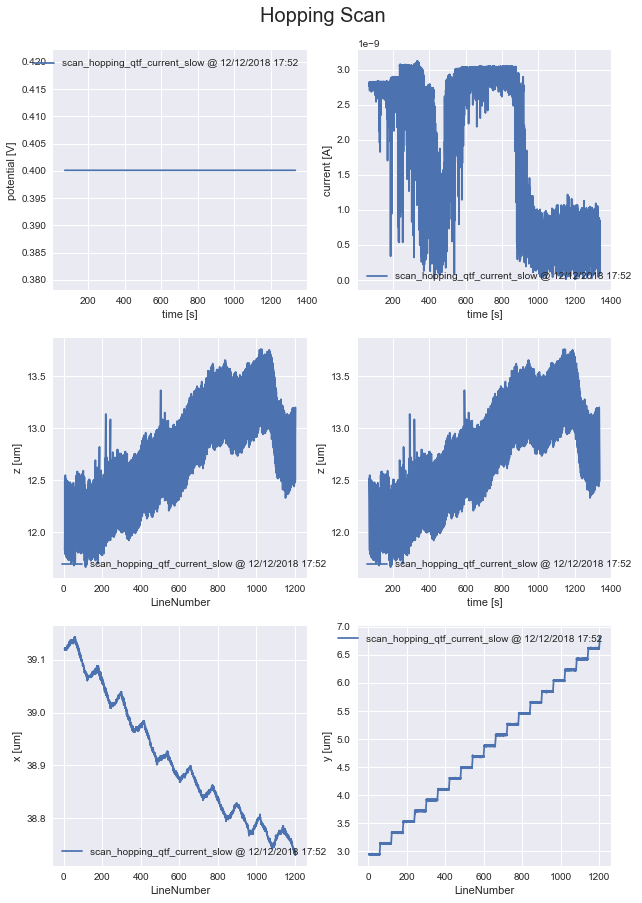

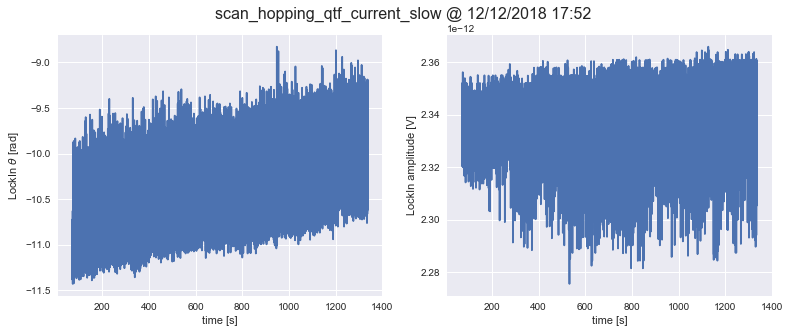

In [273]:
sel = np.arange(0, len(result["LineNumber"])//1)
plots.plot_hopping_scan(result, sel, exp_name, date)

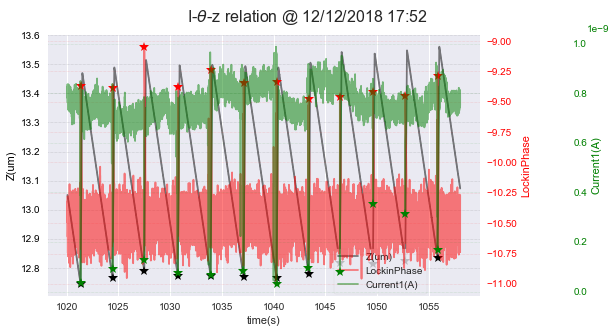

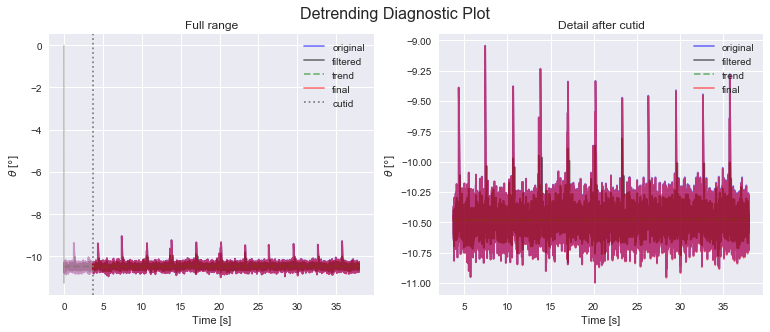

In [371]:
# Select some range for proecssing
sel = np.arange(int(7.5*len(result["LineNumber"])//10),
                int(7.8*len(result["LineNumber"])//10))
subkeys = set(['Z(um)', 'LockinPhase', 'Current1(A)', 'time(s)'])
# Consider applying sel only inside of the fun
subresult = {k:v[sel] for k,v in result.items() if k in subkeys}
xkey = "time(s)"
idxs_ = idxs[np.isin(idxs, sel)]
idxs_ = idxs_ - sel[0]
annot = plots.plot_approach(subresult, xkey, sel, idxs_, date = date)

In [375]:
annot

,Z(um),LockinPhase,Current1(A)
baseline,"[12.757347331, 12.777489547, 12.801293985, 12....","[-10.467797031413943, -10.457344903463836, -10...","[7.394634846e-10, 7.3030793176e-10, 7.08944975..."
peaks_id,"[1230, 4087, 6924, 9925, 12850, 15801, 18751, ...","[1234, 4089, 6924, 9927, 12852, 15803, 18753, ...","[1229, 4085, 6919, 9926, 12846, 15765, 18749, ..."
peaks_times,"[1021.3478128885542, 1024.4390088885639, 1027....","[1021.3519248885543, 1024.4410648885637, 1027....","[1021.3467848885542, 1024.436952888564, 1027.5..."
peaks_val,"[12.745445112, 12.764671773, 12.788476211, 12....","[-9.367087151658614, -9.390041432696233, -9.04...","[3.5706656087e-11, 8.9724417859e-11, 1.2787255..."
rel_change,"[-0.0009329697382368422, -0.001003152767439330...","[0.10515200824510536, 0.10206256756569973, 0.1...","[-0.9517127527854673, -0.8771416631847756, -0...."


In [304]:
np.min(idxs_)
np.min(sel)
sel[0]

885271

883748

883748

In [286]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

np.min(subresult["Current1(A)"])
subresult["Current1(A)"][2237]
np.max(subresult["LockinPhase"])
np.min(subresult["Z(um)"])

np.argmin(subresult["Current1(A)"])
np.argmax(subresult["LockinPhase"])
np.argmin(subresult["Z(um)"])

1.278725547e-10

array([1.27872555e-10])

-9.0443743019

12.788476211

2237

2242

2242

1.278725547e-10

In [ ]:
np.max(subresult("Lock"))

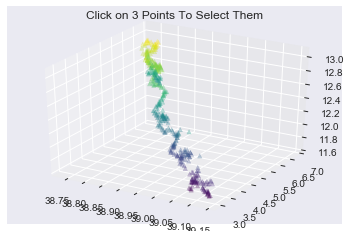

[Press Enter once you have selected 3 points] 



IndexError: list index out of range

In [38]:
plots.plot_surface(result)

### Quartz Tuning Fork

In [39]:
from sicm import io, plots

In [40]:
# Globals
datadir = "C:/Users/mholub/data/sicm/2018/11_Nov/27"

In [41]:
# Locals
exp_name = "scan4"

In [42]:
files, date = io.get_files(datadir, exp_name)
result_ = io.load_result(files, exp_name)

uniqs, cnts = np.unique(result_["LineNumber"], return_counts=True)
linenos = np.arange(5, max(uniqs), 3)
result = io.downsample_to_linenumber(result_, linenos, which = "last")

Avaliable data:
dict_keys(['dt(s)', 'LineNumber', 'LockinPhase', 'LockinAmplitude', 'X(um)', 'Y(um)', 'Z(um)'])
Number of datapoints = (246802,)
Number of datapoints = 1600


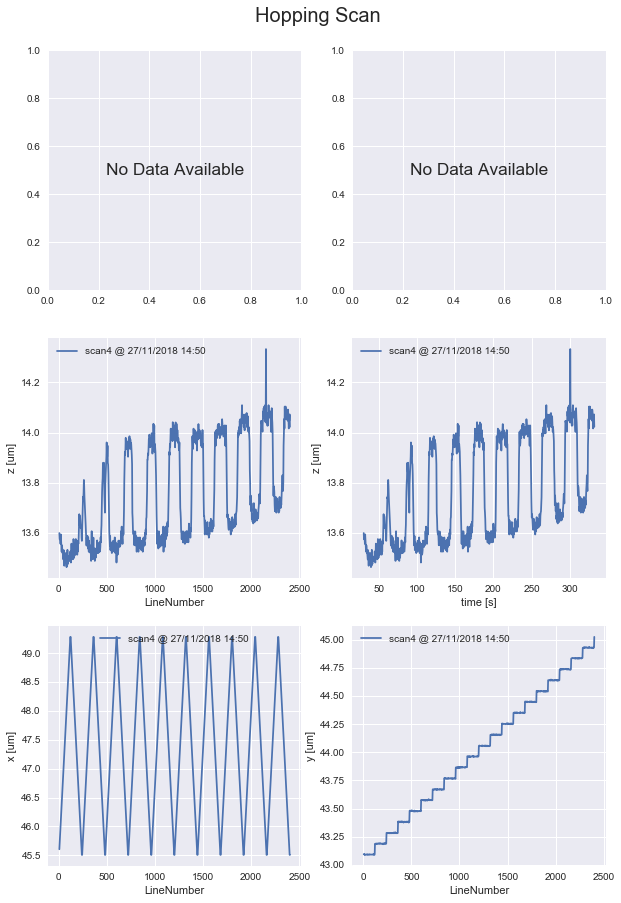

In [43]:
sel = np.arange(0, len(result["LineNumber"])//2)
plots.plot_hopping_scan(result, sel, exp_name, date)

In [8]:
plots.plot_surface(result, transpose=False)

ModuleNotFoundError: No module named 'ipympl'